## EDA of FSIS Processors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fsis = pd.read_csv('../data/fsis-processors-with-location.csv')

In [3]:
fsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1149 non-null   int64  
 1   EstNumber                  1149 non-null   object 
 2   EstID                      1149 non-null   int64  
 3   Parent Corporation         1149 non-null   object 
 4   Establishment Name         1149 non-null   object 
 5   State                      1149 non-null   object 
 6   Size                       1149 non-null   object 
 7   Animals Processed          1149 non-null   object 
 8   Processed
Volume
Category  1148 non-null   float64
 9   Slaughter
Volume
Category  1147 non-null   float64
 10  Full Address               1149 non-null   object 
 11  latitude                   1149 non-null   float64
 12  longitude                  1149 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [4]:
fsis.head()

,Unnamed: 0,EstNumber,EstID,Parent Corporation,Establishment Name,State,Size,Animals Processed,Processed\nVolume\nCategory,Slaughter\nVolume\nCategory,Full Address,latitude,longitude
0,0,M267,4802,JBS,JBS Tolleson Inc.,AZ,Large,Beef,5.0,4.0,"651 S. 91st Ave, Tolleson, AZ 85353",33.441660,-112.252559
1,1,M354,5117,Cargill,Cargill Meat Solutions,CA,Large,Beef,5.0,4.0,"3115 S. Fig Ave., Fresno, CA 93706",36.689651,-119.801950
2,2,M6063A,5289,Central Valley Meat Company,"Central Valley Meat Co., Inc.",CA,Large,Beef,5.0,4.0,"10431 8 3/4 Ave., Hanford, CA 93230",36.321273,-119.612222
3,3,M783 + P783 + V783,5144,Central Valley Meat Company,Harris Ranch Beef Company,CA,Large,Beef,5.0,4.0,"16277 S McCall Ave., Selma, CA 93662",36.499212,-119.614553
4,4,M21488 + V21488,8349,Independent,OWB Packers LLC,CA,Large,Beef,4.0,4.0,"57 East Shank Road, Brawley, CA 92227",33.000969,-115.521786


<Axes: title={'center': 'Distribution of Plant Type (Animals Processed)'}, xlabel='Animals Processed', ylabel='Number of Plants'>

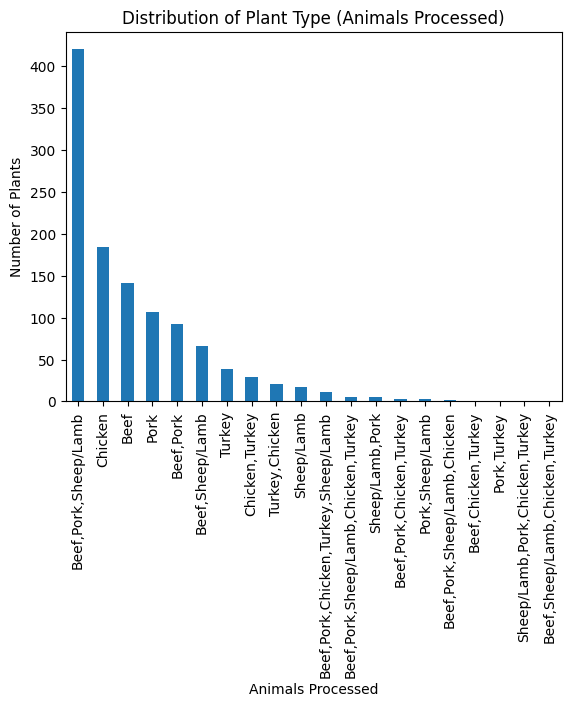

In [6]:
# Bar chart to show distribution of plant types: ex. Beef processing plant

fsis['Animals Processed'].value_counts().plot(kind='bar', title="Distribution of Plant Type (Animals Processed)", ylabel="Number of Plants")

Text(0.5, 1.0, 'Distribution of Plants that Process Chickens (in general)')

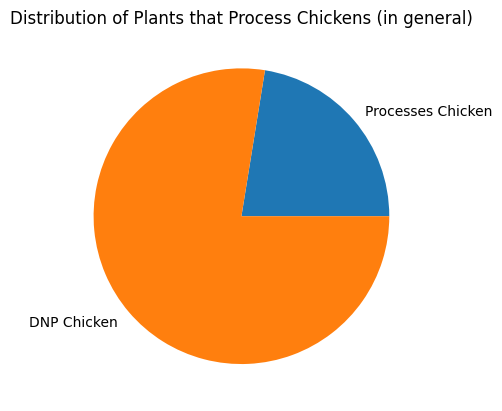

In [7]:
# Pie chart to show the different in plants that 
process_chicken = 0
no_chicken = 0

for i in range(len(fsis)):
    if "Chicken" in fsis["Animals Processed"][i]:
        process_chicken+=1
    else:
        no_chicken+=1
        
labels = ['Processes Chicken', "DNP Chicken"]
values = [process_chicken, no_chicken]

plt.pie(values, labels=labels)
plt.title("Distribution of Plants that Process Chickens (in general)")

# DNP = Does Not Process

Text(0.5, 1.0, 'Distribution of Plants that Process Chickens Only')

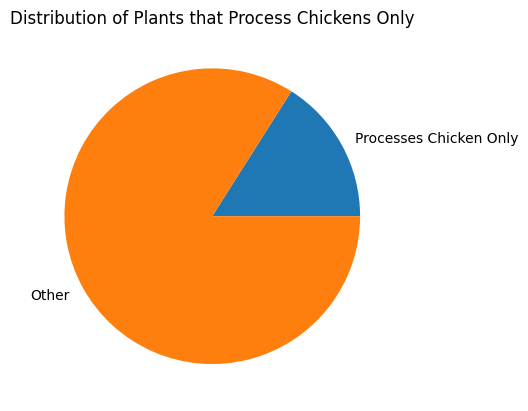

In [43]:
process_chicken_only = 0
no_chicken = 0

for i in range(len(fsis)):
    if fsis["Animals Processed"][i]=="Chicken":
        process_chicken_only+=1
    else:
        no_chicken+=1
        
labels = ['Processes Chicken Only', "Other"]
values = [process_chicken_only, no_chicken]

plt.pie(values, labels=labels)
plt.title("Distribution of Plants that Process Chickens Only")


<Axes: title={'center': 'Distribution of Plant Size'}, xlabel='Size', ylabel='Count'>

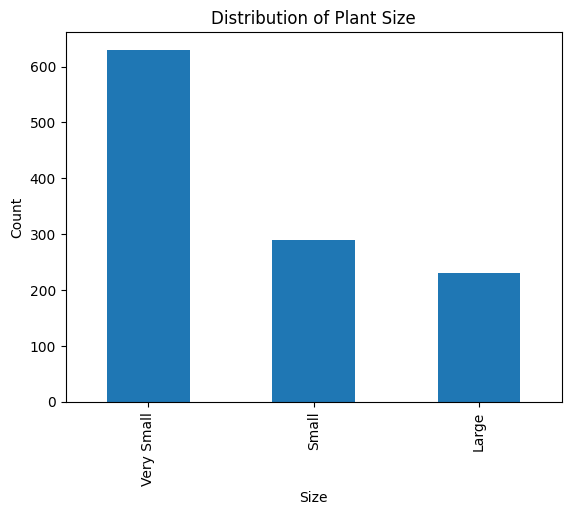

In [17]:
fsis["Size"].value_counts().plot(kind="bar", title="Distribution of Plant Size", ylabel="Count")

In [20]:
fsis["Parent Corporation"].value_counts()

fsis.head()

,Unnamed: 0,EstNumber,EstID,Parent Corporation,Establishment Name,State,Size,Animals Processed,Processed\nVolume\nCategory,Slaughter\nVolume\nCategory,Full Address,latitude,longitude
0,0,M267,4802,JBS,JBS Tolleson Inc.,AZ,Large,Beef,5.0,4.0,"651 S. 91st Ave, Tolleson, AZ 85353",33.441660,-112.252559
1,1,M354,5117,Cargill,Cargill Meat Solutions,CA,Large,Beef,5.0,4.0,"3115 S. Fig Ave., Fresno, CA 93706",36.689651,-119.801950
2,2,M6063A,5289,Central Valley Meat Company,"Central Valley Meat Co., Inc.",CA,Large,Beef,5.0,4.0,"10431 8 3/4 Ave., Hanford, CA 93230",36.321273,-119.612222
3,3,M783 + P783 + V783,5144,Central Valley Meat Company,Harris Ranch Beef Company,CA,Large,Beef,5.0,4.0,"16277 S McCall Ave., Selma, CA 93662",36.499212,-119.614553
4,4,M21488 + V21488,8349,Independent,OWB Packers LLC,CA,Large,Beef,4.0,4.0,"57 East Shank Road, Brawley, CA 92227",33.000969,-115.521786


In [23]:
# dataframe to show animals processed by size
df_process_size = fsis
df_process_size.columns
df_process_size = df_process_size.drop(["Unnamed: 0", "EstNumber", "EstID", "Full Address", "latitude", "longitude", "Processed\nVolume\nCategory", "Slaughter\nVolume\nCategory"], axis=1)

## Large Plant Analysis

<Axes: title={'center': 'Animals Processed at Large Plants'}, xlabel='Animals Processed', ylabel='Count'>

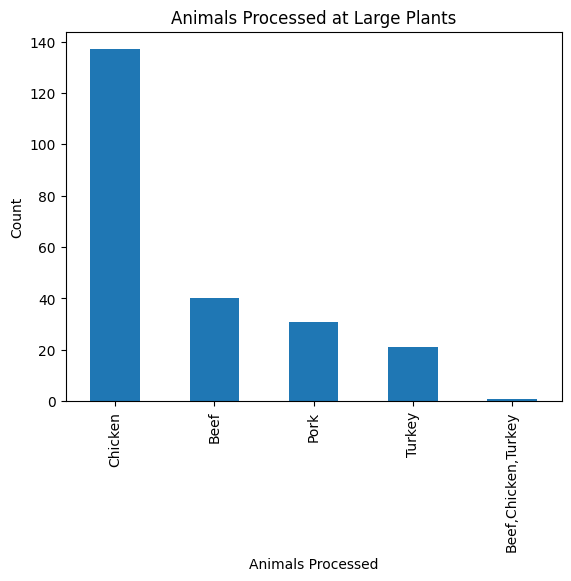

In [24]:
# Large Plant Size analysis
df_process_large = df_process_size[df_process_size["Size"] == "Large"]
df_process_large["Parent Corporation"].value_counts()

df_process_large["Animals Processed"].value_counts().plot(kind="bar", ylabel="Count", title="Animals Processed at Large Plants")

230

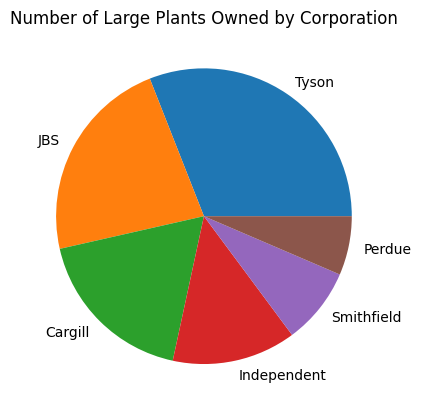

In [25]:
# Number of large plants but shows only Corps who have 10 or more
value_counts = df_process_large["Parent Corporation"].value_counts()
# value_counts[value_counts >= 10].plot(kind="bar", ylabel="Count", title="Number of Large Plants Owned by Corporation")
value_counts[value_counts >= 10].plot(kind="pie", title="Number of Large Plants Owned by Corporation", ylabel="")

len(df_process_large)

## Small Plant Analysis

<Axes: title={'center': 'Animals Processed at Small Plants'}, xlabel='Animals Processed', ylabel='Count'>

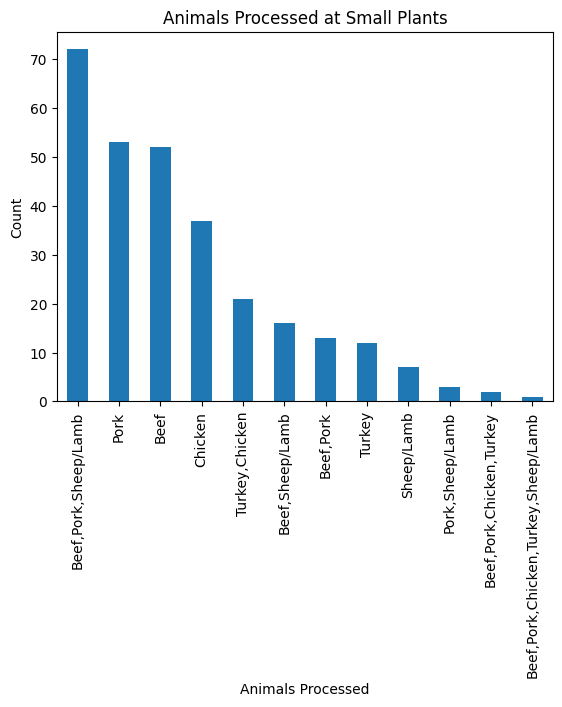

In [82]:
# Small Plant Size analysis
df_process_small = df_process_size[df_process_size["Size"] == "Small"]
df_process_small["Parent Corporation"].value_counts()

df_process_small["Animals Processed"].value_counts().plot(kind="bar", ylabel="Count", title="Animals Processed at Small Plants")

289

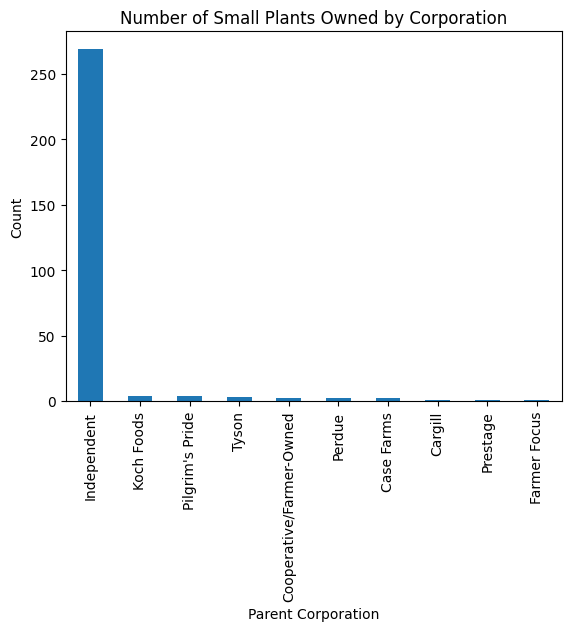

In [106]:
value_counts = df_process_small["Parent Corporation"].value_counts()
value_counts.plot(kind="bar", title="Number of Small Plants Owned by Corporation", ylabel="Count")
# value_counts.plot(kind="pie", title="Number of Small Plants Owned by Corporation", ylabel="", labeldistance=1.1)

len(df_process_small)

## Very Small Plant Analysis

<Axes: title={'center': 'Animals Processed at Very Small Plants'}, xlabel='Animals Processed', ylabel='Count'>

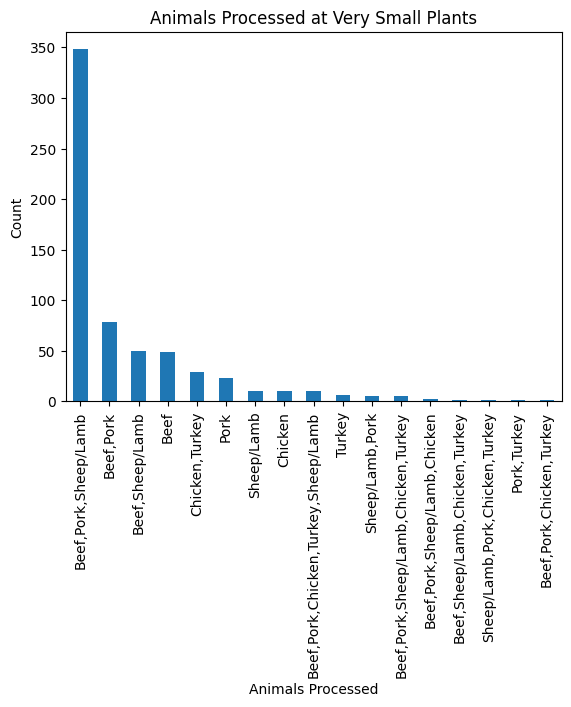

In [81]:
# Small Plant Size analysis
df_process_Vsmall = df_process_size[df_process_size["Size"] == "Very Small"]
df_process_Vsmall["Parent Corporation"].value_counts()

df_process_Vsmall["Animals Processed"].value_counts().plot(kind="bar", ylabel="Count", title="Animals Processed at Very Small Plants")

289

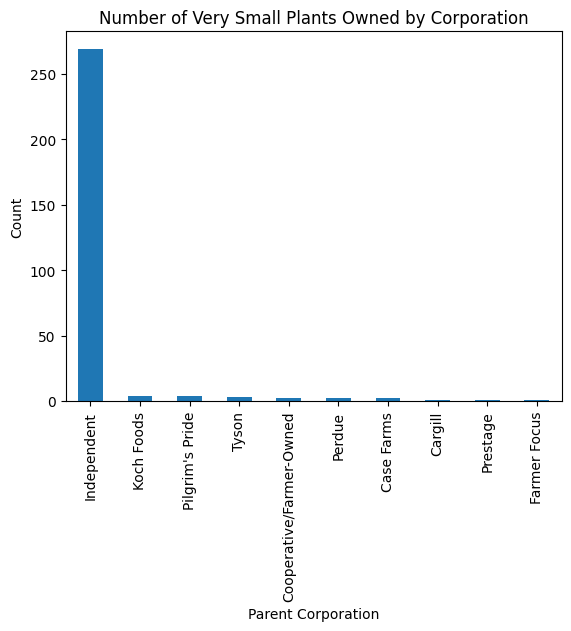

In [105]:
# Number of very small plants but shows only Corps who have 10 or more
value_counts = df_process_small["Parent Corporation"].value_counts()
value_counts.plot(kind="bar", title="Number of Very Small Plants Owned by Corporation", ylabel="Count")

len(df_process_small)

## Location by State Analysis

### Tyson Plants

<Axes: title={'center': 'Number of Plants by State'}, xlabel='State', ylabel='Count'>

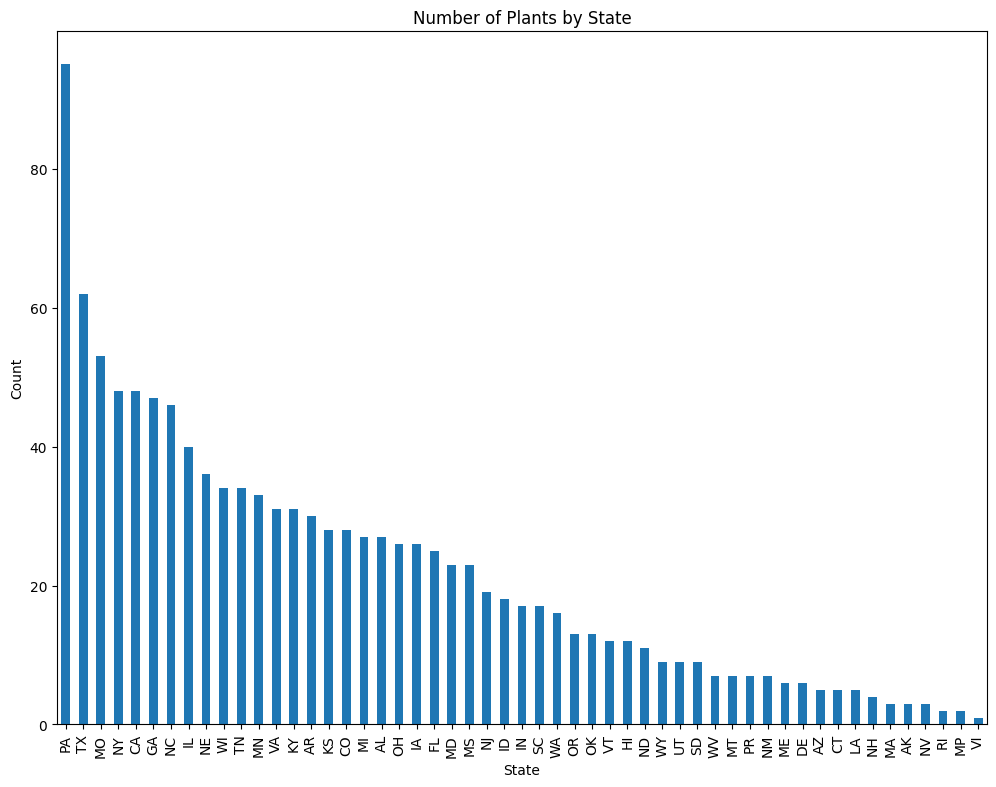

In [14]:
fsis["State"].value_counts().plot(kind="bar", figsize=(12,9), ylabel="Count", title="Number of Plants by State")

<Axes: title={'center': 'Large Plants by State'}, xlabel='State', ylabel='Count'>

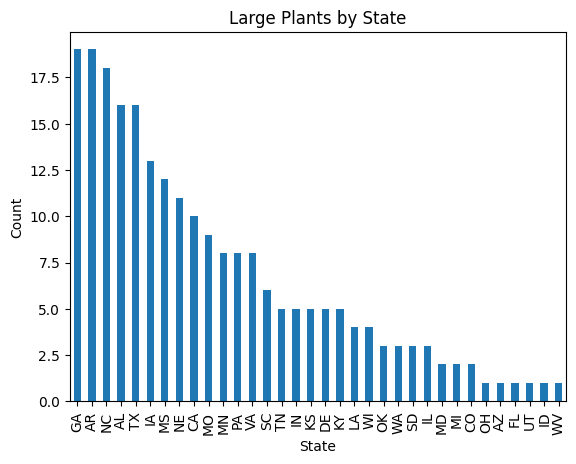

In [65]:
large_plants = fsis[fsis["Size"] == "Large"]
large_plants["State"].value_counts().plot(kind="bar", title="Large Plants by State", ylabel="Count")

<Axes: title={'center': 'Tyson Plant Counts by State'}, xlabel='State', ylabel='Count'>

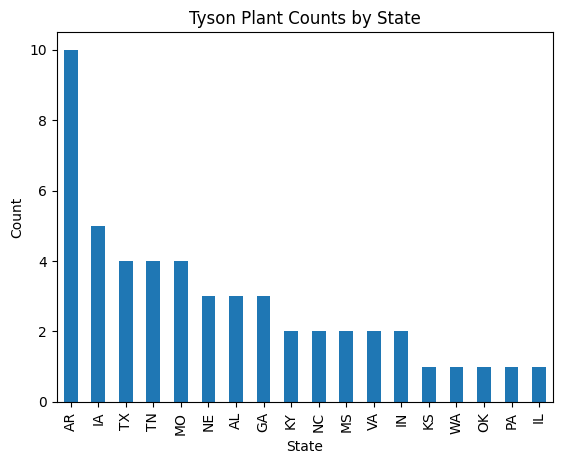

In [40]:
# tyson only
tyson_plants = fsis[ (fsis["Parent Corporation"] == "Tyson") ]
tyson_plants.head()

tyson_plants["State"].value_counts().plot(kind="bar", title="Tyson Plant Counts by State", ylabel="Count")


<Axes: title={'center': 'Tyson Animal Processing Plants'}, xlabel='Animals Processed'>

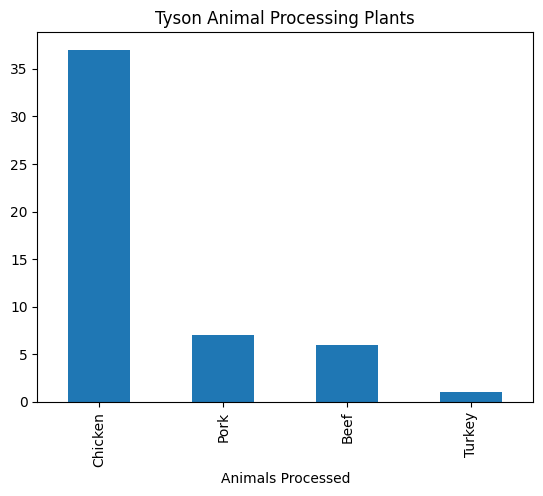

In [51]:
tyson_plants["Animals Processed"].value_counts().plot(kind="bar", title="Tyson Animal Processing Plants")

<Axes: title={'center': 'Tyson Chicken Processing Plants'}, xlabel='State', ylabel='Count'>

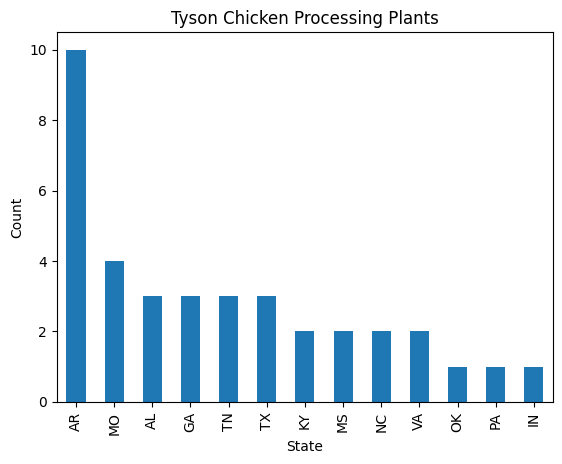

In [56]:
tyson_chicken_plants = tyson_plants[tyson_plants["Animals Processed"] == "Chicken"]

tyson_chicken_plants["State"].value_counts().plot(kind="bar", title="Tyson Chicken Processing Plants", ylabel="Count")


### JBS Plants

<Axes: title={'center': 'JBS Plant Counts by State'}, xlabel='State', ylabel='Count'>

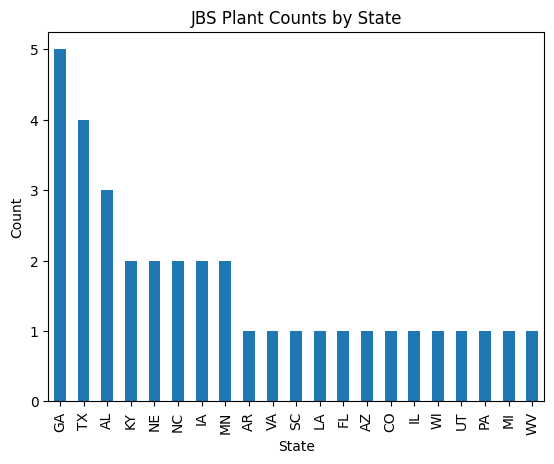

In [45]:
#JBS only

jbs_plants = fsis[fsis["Parent Corporation"] == "JBS"]

jbs_plants["State"].value_counts().plot(kind="bar", title="JBS Plant Counts by State", ylabel="Count")

<Axes: title={'center': 'JBS Animal Processing Plants'}, xlabel='Animals Processed', ylabel='Count'>

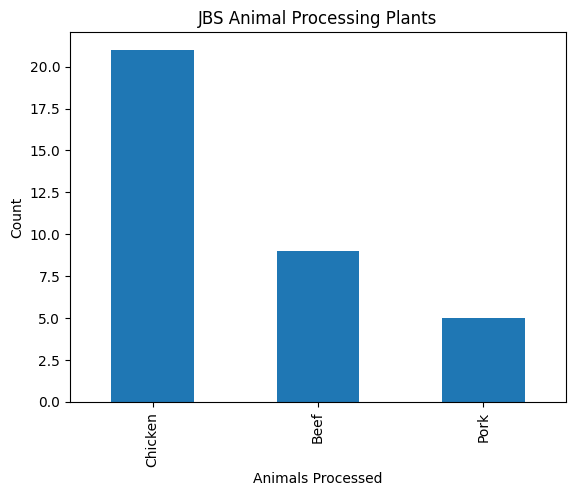

In [53]:
jbs_plants["Animals Processed"].value_counts().plot(kind="bar", title="JBS Animal Processing Plants", ylabel="Count")

<Axes: title={'center': 'JBS Chicken Processing Plants'}, xlabel='State', ylabel='Count'>

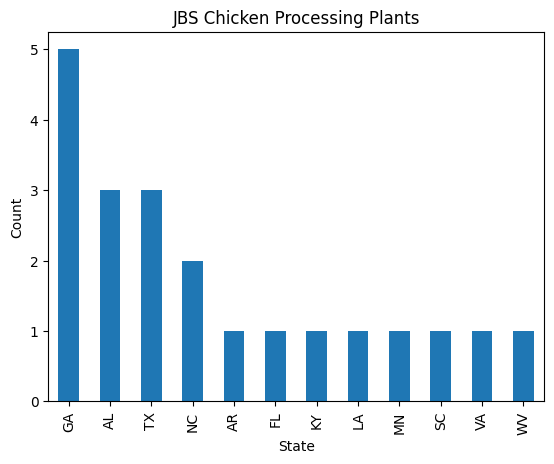

In [60]:
jbs_chicken_plants = jbs_plants[jbs_plants["Animals Processed"] == "Chicken"]

jbs_chicken_plants["State"].value_counts().plot(kind="bar", title="JBS Chicken Processing Plants", ylabel="Count")

#### Creating dummy variables for each type of meat

In [6]:
animals = ["Beef", "Pork", "Sheep/Lamb", "Chicken", "Turkey"]
distrib = {}

for animal in animals:
    fsis[animal] = fsis['Animals Processed'].str.contains(animal).astype(int)
    distrib[animal] = sum(fsis[animal])

In [7]:
print(distrib) # Distribution of types of meat

{'Beef': 742, 'Pork': 650, 'Sheep/Lamb': 531, 'Chicken': 258, 'Turkey': 112}


### Distribution of locations by states

In [8]:
fsis.pivot_table(values=animals, index="State", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
State,,,,,
AK,3,0,3,3,0
AL,7,19,7,6,1
AR,7,21,5,5,5
AZ,5,0,2,2,0
CA,29,12,17,17,7
CO,25,1,19,19,0
CT,5,0,3,4,0
DE,1,5,1,1,0
FL,19,2,13,13,1


In [9]:
fsis.pivot_table(values=animals, index="Parent Corporation", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
Parent Corporation,,,,,
American Foods Group,3,0,0,0,0
Amick,0,3,0,0,0
Aterian Investment Partners,0,1,0,0,0
Bachoco,0,2,0,0,0
Cargill,6,20,0,0,3
Case Farms,0,4,0,0,0
Central Valley Meat Company,2,0,0,0,0
Clemens Food Group,0,0,2,0,0
Cooperative/Farmer-Owned,5,0,8,5,3
